In [6]:
import pandas as pd
import openpyxl

In [2]:
archivo_excel = "Indicadores_del_desarrollo_humano.xlsx"
df = pd.read_excel(archivo_excel, sheet_name='Data')
df.head()

,Series Name,Series Code,Country Name,Country Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019 [YR2019]
0,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Estados Unidos,USA,9632030,9632030,9632030,9632030,9632030,9632030,...,9831510,9831510,9831510,9831510,9831510,9831510,9831510,9831510,9831510,..
1,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Unión Europea,EUU,4384964.995117,4384984.995117,4385294.995117,4385644.995117,4385414.995117,4385434.995117,...,4386039.990234,4386021.99707,4383341.99707,4384062.192383,4384082.592773,4384131.577148,4384317.592773,4384317.592773,4384317.592773,..
2,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Japón,JPN,377800,377880,377890,377900,377910,377910,...,377950,377955,377960,377961.992188,377961.992188,377971.015625,377970,377970,377970,..
3,Superficie (kilómetros cuadrados),AG.SRF.TOTL.K2,Mundo,WLD,131606512.293178,131606902.668177,131607327.418178,131607728.793148,131605872.777079,131607830.159892,...,131805574.218215,131805826.432909,131803288.425096,132047813.110236,132046109.51847,132048793.077485,132036620.811879,132036620.811879,132025199.411879,..
4,"INB, método Atlas (US$ a precios actuales)",NY.GNP.ATLS.CD,Estados Unidos,USA,10147603801972.083984,10462204209818.1875,10732675433275.623047,11536447371063.488281,12740511355508.546875,13651359826763.560547,...,15154198695429.419922,15756881924473.791016,16560497008306.333984,17048936792646.988281,17776476297335.480469,18191395170920.964844,18467339419486.53125,19194752830167.121094,20636317813893.097656,..


In [3]:
#FILTRO DEL INDICADOR A EVALUAR
INB_df = df[df['Series Code'] == 'NY.GNP.PCAP.PP.CD']
# TRANSPOSICIÓN
INB_df_Transpose = INB_df.transpose()
INB_df_Transpose
''' 
TRANSFORMACIÓN: ELIMINO LAS 3 PRIMERAS COLUMNAS (me quedo con Country Code, los años  y las siglas de paises)
Y LA ULTIMA (ya que no tiene valores)
'''
INB_df_Transpose=INB_df_Transpose.iloc[3:]
INB_df_Transpose= INB_df_Transpose.iloc[:-1]
INB_df_Transpose

# Creamos un DataFrame nuevo
df_nuevo = pd.DataFrame(INB_df_Transpose.values, columns=INB_df_Transpose.iloc[0])
df_nuevo = df_nuevo.iloc[1:]
df_nuevo

#Agregamos una columna con los años
Anio=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
df_nuevo['Year']=Anio
df_nuevo

Country Code,USA,EUU,JPN,WLD,Year
1,36800,22012.948826,27220,7942.251914,2000
2,37700,23059.884679,27890,8224.350834,2001
3,38430,24006.003789,28560,8503.933238,2002
4,39740,24521.622477,29380,8863.303582,2003
5,42060,25728.18648,30920,9468.130636,2004
6,44570,26735.436558,32350,10074.38831,2005
7,47160,29062.621218,33960,10952.568348,2006
8,48280,30845.392794,35540,11690.168249,2007
9,48290,32254.831803,35710,12197.575001,2008
10,46940,31789.387975,34010,12161.703952,2009


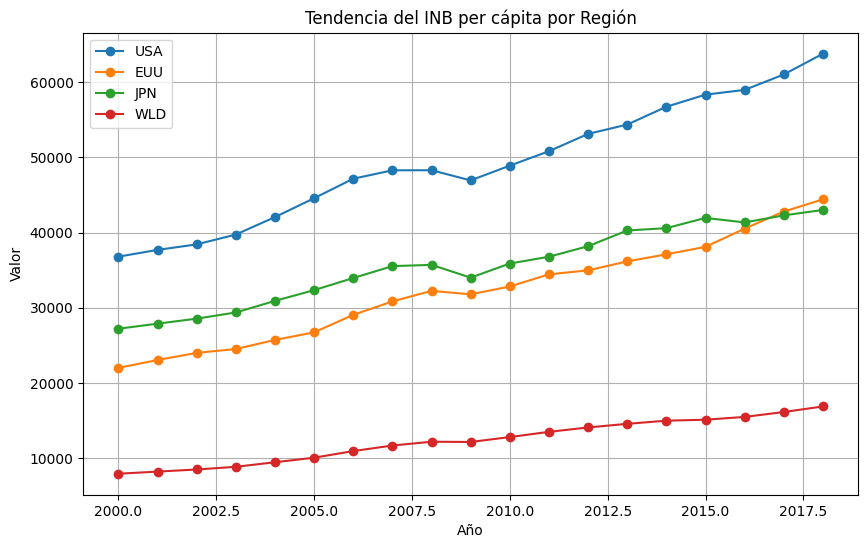

In [5]:
#REALIZO grafico de lineas
import matplotlib.pyplot as plt
# Agrego una línea para cada serie de datos
plt.figure(figsize=(10, 6))
plt.plot(df_nuevo['Year'], df_nuevo['USA'], marker='o', label='USA')
plt.plot(df_nuevo['Year'], df_nuevo['EUU'], marker='o', label='EUU')
plt.plot(df_nuevo['Year'], df_nuevo['JPN'], marker='o', label='JPN')
plt.plot(df_nuevo['Year'], df_nuevo['WLD'], marker='o', label='WLD')

# Personalizamos el gráfico
plt.xlabel('Año')
plt.ylabel('Valor')
plt.title('Tendencia del INB per cápita por Región')
plt.legend()
plt.grid(True)
# Configurar el formato de los ticks en el eje x para mostrar años como números enteros
#plt.xticks(years, rotation=45)
# Establecer automáticamente los límites del eje x
#plt.xlim(min(2000), max(2018))
plt.show()